In [1]:
import pandas as pd
import numpy as np
import plotnine as p9

In [2]:
raw = open("input.txt").read().strip().split("\n")

In [3]:
# L 0 0 0 1   1
# O 0 0 1 0   2
# R 0 1 0 0   4
# U 1 0 0 0   8


In [31]:
grid = [list(element) for element in raw]
grid = np.array(grid)
way = np.zeros((grid.shape[0], grid.shape[1]))
start = np.where(grid == 'S')
szeile = start[0][0]
sspalte = start[1][0]

In [30]:
weiter = True
zeile = szeile
spalte = sspalte +1 
zaehler = 0
d = 'E'
while weiter:
    zaehler = zaehler +1
    #print(zaehler, d, grid[zeile, spalte], end=' ')

    found = False
    if d=='E':
        if grid[zeile, spalte] == 'J':
            d='N'
            way[zeile, spalte] = 1
            sc = 0
            zc = -1
            found = True
        if grid[zeile, spalte] == '-':
            d='E'
            way[zeile, spalte] = 1
            sc = 1
            zc = 0
            found = True
        if grid[zeile, spalte] == '7':
            d='S'
            way[zeile, spalte] = 1
            sc = 0
            zc = 1
            found = True
    if d=='N':
        if grid[zeile, spalte] == '|':
            d='N'
            way[zeile, spalte] = 1
            sc = 0
            zc = -1
            found = True
        if grid[zeile, spalte] == '7':
            d='W'
            way[zeile, spalte] = 1
            sc = -1
            zc = 0
            found = True
        if grid[zeile, spalte] == 'F':
            d='E'
            way[zeile, spalte] = 1
            sc = 1
            zc = 0
            found = True
    if d=='W':
        if grid[zeile, spalte] == '-':
            d='W'
            way[zeile, spalte] = 1
            sc = -1
            zc = 0
            found = True
        if grid[zeile, spalte] == 'L':
            d='N'
            way[zeile, spalte] = 1
            sc = 0
            zc = -1
            found = True
        if grid[zeile, spalte] == 'F':
            d='S'
            way[zeile, spalte] = 1
            sc = 0
            zc = 1
            found = True
    if d=='S':
        if grid[zeile, spalte] == '|':
            d='S'
            way[zeile, spalte] = 1
            sc = 0
            zc = 1
            found = True
        if grid[zeile, spalte] == 'L':
            d='E'
            way[zeile, spalte] = 1
            sc = 1
            zc = 0
            found = True
        if grid[zeile, spalte] == 'J':
            d='W'
            way[zeile, spalte] = 1
            sc = -1
            zc = 0
            found = True
    
    if grid[zeile, spalte] == 'S':
        print('found')
        weiter = False
    if grid[zeile, spalte] =='.' or found==False:
        print('Abbruch')
        weiter = False
    if found:
        #print(d)
        zeile = zeile +zc
        spalte = spalte +sc
    if zaehler>20000:
        weiter = False

print (zaehler/2)
    

found
Abbruch
6890.0


In [8]:
data = {'x': [], 'y': [], 'value': []}
for x in range(140):
    for y in range(140):
        data['x'].append(x)
        data['y'].append(y)
        data['value'].append(way[x, y])

In [15]:
df = pd.DataFrame(data)
df = df.query("value>0").reset_index(drop=True)
df['z'] = 'X'

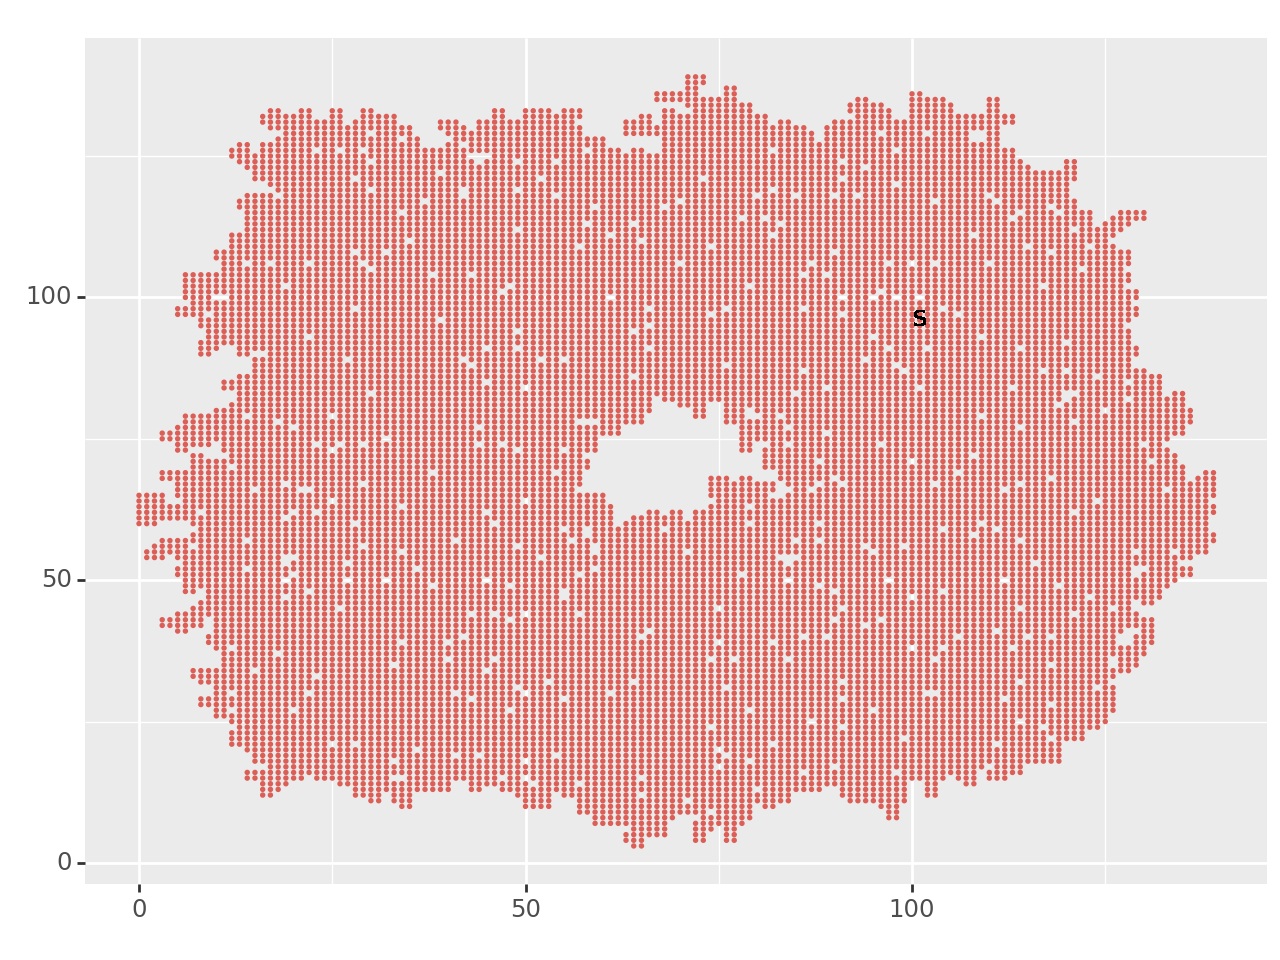

<Figure Size: (640 x 480)>

In [25]:
(p9.ggplot(df)
 + p9.geom_point(p9.aes(x='x',y='y', color='z'), size=.1)
 + p9.labs(x='',y='')
 + p9.theme(legend_position='none')
 + p9.geom_text(x=sspalte, y=szeile,label='S', size=8)
)

In [ ]:
way.sum()

13779.0